  **1.- Describiendo la misión Gaia**

---

Gaia (Global Astrometric Interferometer for Astrophysics) es una misión espacial de la ESA (Agencia Espacial Europea) lanzada el 19 de diciembre de 2013 y puesta en operación el 25 de Julio de 2014. La misión Gaia tiene como objetivo recopilar datos para entender el origen y evolución de la Via Lactea. Los datos y observables que se recopilaran son sobre observaciones multicolor, velocidades radiales, movimientos propios, posiciones y distancias de mil millones de estrellas, con los cuales se hará un mapa 3D de la Via Lactea, el mapa estelar mas completo y preciso hasta  ahora.

El primer lazamiento de datos (Gaia-DR1) fue el 14 de septiembre de 2016 el cual contiene posiciones y magnitudes en G de estrellas.

Los demáslanzamientos de datos de Gaia serán a mediados de los años 2017, 2018, 2019 y 2022.

Fuentes:
> *http://gaiaverse.eu/la-mision-gaia/*

> *http://gaiavideo.ub.edu/*

> *https://es.wikipedia.org/wiki/Gaia_(sonda_espacial)*

> *http://sci.esa.int/gaia/*

  **2.- Describiendo el catálogo RAVE-ON**

---

*RAVE* (RAdial Velocity Experiment) es un surveys espectroscópico en el cual contiene datos como temperatura efectiva, gravedad superficial y abundancia química, el cual se complementa con los catálogos TGAS y APOGEE, los cuales nos permiten realizar un análisis químico-dinámico de la Vía Láctea.

Fuentes:
> *http://arxiv.org/pdf/1609.02914v1.pdf*

> *https://ui.adsabs.harvard.edu/#abs/2016arXiv160902914C/abstract*

  **3.- Preparando los catálogos**

---

Primero se descarga los archivos del módulo, depués se instala el fork del módulo *gaia_tools* con el comando *python setup.py install* en el mismo directorio donde se descargaron los archivos, luego se instala el módulo *fitsio* con el comando *pip install fitsio* y finalmente se define por consola la variable de ambiente GAIA_TOOL_DATA con el comando *export GAIA_TOOLS_DATA = /home/Felipe/Descargas* para descargar los catálogos en ese mismo directorio.

Fuentes:
> *https://github.com/andres-jordan/gaia_tools*

> *https://github.com/esheldon/fitsio*

  **4.- Descargando los catálogos TGAS y RAVE-ON**

---

Se hace correr una vez el siguiente código para descargar los catálogos.

In [1]:
import gaia_tools.load as gload

tgas_cat = gload.tgas()
raveon_cat = gload.raveon()

Fuentes:
> *https://github.com/andres-jordan/gaia_tools*

  **5.- Investigando la estructura de los catálogos**

---

Se investiga la estructura de los catálogos. Primero tenemos TGAS y luego RAVE-ON.

In [2]:
from astropy.io import fits

hdulist1 = fits.open('TgasSource_000-000-000.fits')
hdulist1.info()
hdulist1[1].header

Filename: TgasSource_000-000-000.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      16   (37650,)     uint8   
1    TgasSource_000-000-000.fits  BinTableHDU    218   134865R x 59C   [J, 11A, K, K, K, D, D, D, D, D, D, D, D, D, D, D, E, E, E, E, E, E, E, E, E, E, J, J, J, J, J, J, E, D, D, L, E, E, E, J, I, L, E, E, E, E, E, E, E, E, J, D, D, D, 13A, D, D, D, D]   


XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional table                            
NAXIS1  =                  336 / width of table in bytes                        
NAXIS2  =               134865 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group                                 
TFIELDS =                   59 / number of columns                              
EXTNAME = 'TgasSource_000-000-000.fits' / table name                            
TTYPE1  = 'hip     '           / label for column 1                             
TFORM1  = 'J       '           / format for column 1                            
TNULL1  =          -2147483648 / blank value for column 1                       
TUCD1   = 'meta.id.cross'   

In [3]:
hdulist1.close()

Los datos del catálogo *TGAS* contienen velocidades angulares y distancias. Las mediciones que nos serán de utilidad en esta tarea serán:

- Ángulo de Paralaje (parallax)

- Error en el Ángulo de Paralaje (parallax_error)

- Velocidad Ascensión Recta (pmra)

- Velocidad Declinación (pmdec)

In [4]:
hdulist2 = fits.open('RAVE-on-v1.0.fits')
hdulist2.info()
hdulist2[1].header

Filename: RAVE-on-v1.0.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       4   ()              
1                BinTableHDU    124   520701R x 58C   [31A, 16A, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 4A, 1A, 1A, 1A, 1A, 1A, 1A, 1A, 1A, 1A, 1A, 1A, 1A, 1A, 1A, 1A, 1A, 1A, 1A, 1A, 1A, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, L]   


XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  344 / length of dimension 1                          
NAXIS2  =               520701 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   58 / number of table fields                         
TTYPE1  = 'RAVE_OBS_ID'                                                         
TFORM1  = '31A     '                                                            
TTYPE2  = 'RAVEID  '                                                            
TFORM2  = '16A     '                                                            
TTYPE3  = 'RA      '        

In [5]:
hdulist2.close()

En el catálogo *RAVE-ON* tenemos principalmente datos espectroscópicos como gravedad y temperatura. Los datos que nos serán útiles son:

- Ascensión Recta (RA)

- Declinación (DE)

- Velocidad Radial (HRV)

Fuentes:
> *http://arxiv.org/pdf/1609.02914v1.pdf*

  **6.- Match de los catálogos y gráfico $M_G$ vs $T_{eff}$**

---

Ahora hacemos el match de los catálogos.

In [6]:
from gaia_tools import xmatch

m1,m2,sep = xmatch.xmatch(raveon_cat,tgas_cat,epoch1=2000,colRA2='ra',colDec2='dec',epoch2=2015)

In [7]:
import numpy as np

PaPE = tgas_cat[m2]['parallax']/tgas_cat[m2]['parallax_error'] > 10 #seleccionamos fuentes de señal a ruido mayor a 10
m1 = m1[PaPE]
m2 = m2[PaPE]

T = raveon_cat[m1]['TEFF']
m = tgas_cat[m2]['phot_g_mean_mag']
d = tgas_cat[m2]['parallax']
M = m+5+5*np.log10(d)-15

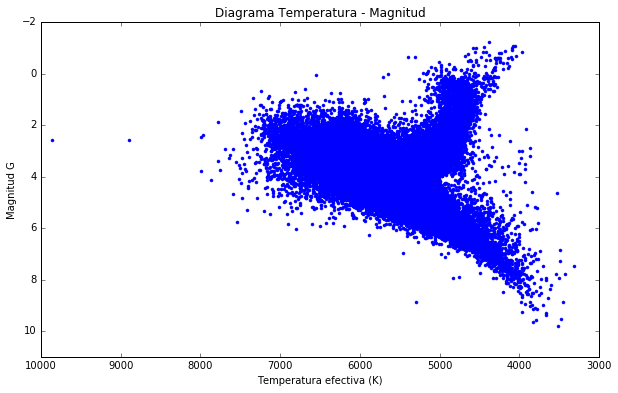

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

nan = np.isnan(T) + np.isnan(M)

Teff = []
MG = []

Teff.append(T[~nan]) #eliminamos nan
MG.append(M[~nan])

fig, axis = plt.subplots(figsize=(10,6)) # graficamos
for i in range(len(Teff)):
    plt.plot(Teff[i],MG[i],'b.')

plt.xlim(10000,3000)
plt.ylim(11,-2)
plt.xlabel('Temperatura efectiva (K)')
plt.ylabel('Magnitud G')
plt.title('Diagrama Temperatura - Magnitud')
plt.show()

En el diagrama temperatura versus magnitud G se pueden ver las secuencias principales de muchas poblaciones estelares. También se puede ver que la rama de las gigante y sub-gigantes es muy ancha, debido a que tenemos multiples poblaciones estelares con distitas temperatura y metalicidades.

Para hacer el diagrama de Hess, copiamos el código de la tarea 1.2

In [11]:
from scipy.stats import gaussian_kde

ejes = list(zip(Teff,MG))
Teff, MG = zip(*ejes)

VI = np.vstack([Teff,MG])
z = gaussian_kde(VI)(VI)

fig, ax = plt.subplots()
graf = ax.scatter(Teff, MG, c=z, s=10, marker='s', edgecolor='')
fig.colorbar(graf)
plt.xlim(10000,3000)
plt.ylim(11,-2)
plt.xlabel('Temperatura efectiva (K)')
plt.ylabel('Magnitud G')
plt.title('Diagrama de Hess de Temperatura - Magnitud')
plt.show()

KeyboardInterrupt: 

Fuentes:
> *https://github.com/andres-jordan/gaia_tools*

  **7.- Diagrama $v_x$ - $v_y$**

---

Para obtener el diagrama $v_x$-$v_y$ primero extraemos las variables ascensión recta (RA), declinación (DEC), velocidad radial (HRV), velocidad ascensión recta (pmra), velocidad declinación (pmdec) y ángulo de paralaje (parallax). luego transformamos de coordenadas y finalmente se grafica.

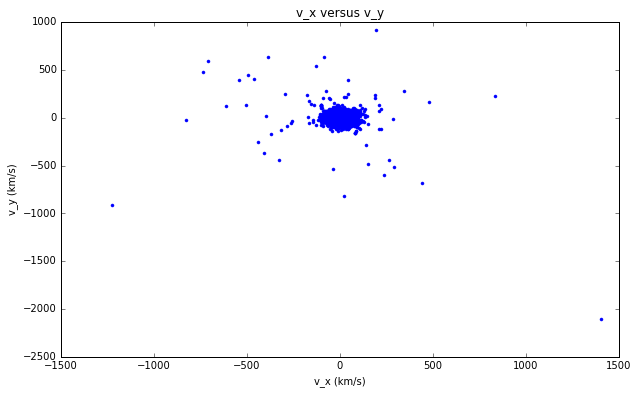

In [9]:
from astropy import units as u
from astropy.coordinates import SkyCoord

va = tgas_cat[m2]['pmra']
vd = tgas_cat[m2]['pmdec']
# la variable 'd' contiene parallax

ar = raveon_cat[m1]['RA'] # ascensión recta
dec = raveon_cat[m1]['DEC'] # declinación
vr = raveon_cat[m1]['HRV']

#transformamos unidades
d_as = d*10**(-3) # de miliarcosegundos a arcosegundos
va_as = va*10**(-3)
vd_as = vd*10**(-3)

k = 4.74047
theta = np.radians(123) # 123°
corgal = SkyCoord('12h51m26.282s', '+27d07m42.01s', frame='icrs')
angp = corgal.ra.radian # 12h 49m punto galáctico
dngp = corgal.dec.radian # 27,4° punto galáctico

matrizT = np.matrix([[-np.cos(theta)*np.cos(angp)*np.sin(dngp)-np.sin(theta)*np.sin(angp),-np.cos(theta)*np.sin(dngp)*np.sin(angp)+np.sin(theta)*np.cos(angp),np.cos(theta)*np.cos(dngp)],
                     [-np.sin(theta)*np.cos(angp)*np.sin(dngp)+np.cos(theta)*np.sin(angp),-np.sin(theta)*np.sin(dngp)*np.sin(angp)-np.cos(theta)*np.cos(angp),np.sin(theta)*np.cos(dngp)],
                     [np.cos(dngp)*np.cos(angp),np.cos(dngp)*np.sin(angp),np.sin(dngp)]])

fig, axis = plt.subplots(figsize=(10,6)) # graficamos
# tome solo algunas fuentes (porque tomandolas todas explota el pc, pero en tu pc supongo que las puedes tomar todas)
for j in range(10000):
    matrizA = np.matrix([[np.cos(dec[j])*np.cos(ar[j]),-np.sin(ar[j]),-np.cos(ar[j])*np.sin(dec[j])],
                         [np.cos(dec[j])*np.sin(ar[j]),np.cos(ar[j]),-np.sin(ar[j])*np.sin(dec[j])],
                         [np.sin(dec[j]),0,np.cos(dec[j])]])
    matrizF = matrizT * matrizA
    vectori = np.array([vr[j],k*va_as[j]*np.cos(dec[j])/d_as[j],k*vd_as[j]/d_as[j]])
    vectorf = np.dot(matrizF, vectori)
    vx = vectorf[0,0]
    vy = vectorf[0,1]
    plt.plot(vx,vy,'b.')

#plt.xlim(8200,3200)
#plt.ylim(11,-2)
plt.xlabel('v_x (km/s)')
plt.ylabel('v_y (km/s)')
plt.title('v_x versus v_y')
plt.show()

Vemos que el giro está centrada en cero (esperable ya que el sistema de coordenadas está definida en la galaxia, o sea la galaxia no se mueve con respecto a su propio sistema de referencia). También se ve que no es un círculo, sino que tiene un cierto alargamiento en la velocidad $x$. Esto probablemente sea por la velocidades relativas que tienen cumulos y zonas de formación estelar entre ellas, es decir, hay una dinámica en la galaxia.

Ahora hacemos el diagrama de Hess:

Fuentes:
> *https://ui.adsabs.harvard.edu/#abs/2009ApJ...700.1794B/abstract*

> *http://iopscience.iop.org/article/10.1088/0004-637X/700/2/1794/pdf*